In [1]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from distance_matching_lowrank import DistanceMatching
import functions
import utils
#import umap.umap_ as umap

import matplotlib.pyplot as plt
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data/training.txt", sep=' ', header=0)
df

,patid,50.31328,50.760375,51.09004,51.5520625,52.1180833333333,52.6666,53.014,53.54175,53.9679230769231,...,1196.625,1197.125,1197.54108994709,1197.87566137566,1198.20758730159,1198.62441549295,1199.04175,1199.4166,1199.8334,outcome
0,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.983630,1.814622,0.795725,1.215553,2.062402,2.295189,2.347183,1.793114,1.217308,0
1,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.179857,0.916177,1.309737,1.547255,1.305659,0.888048,1.275088,1.872173,2.443506,0
2,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.576508,2.892378,2.422044,4.237218,2.454857,2.199061,3.699815,2.860644,3.387605,0
3,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.391922,1.919464,2.875280,2.983004,1.133736,1.774645,1.942365,1.257582,1.641153,0
4,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.008264,1.399420,1.127815,1.586741,0.713218,1.281478,1.109225,0.603305,0.507084,0
5,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.768052,0.965008,0.644657,0.431944,0.716833,1.485086,1.135308,0.689597,1.730108,0
6,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.094782,0.924944,1.375808,1.747223,1.634809,0.395208,1.707033,1.197914,1.584772,0
7,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.843492,2.141152,1.677102,1.065647,1.081651,2.237313,1.187909,1.503200,2.550065,0
8,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.523665,1.942845,2.315109,1.294178,1.340617,1.559115,1.768132,1.507783,1.746210,0
9,16-1779,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.864403,1.656664,1.520657,1.156124,2.847426,1.008327,2.122904,1.657459,1.272226,0


In [3]:
n_points = None
n_Z = 1500
X = df.loc[:n_points, :df.columns[-2]].values
print(X.shape)
#X_not_Z = df.loc[:n_points, df.columns[1]:df.columns[-n_Z]].values
Y = df.loc[:n_points, df.columns[-1]].values
#outcome_by_id = {patient: outcome for patient, outcome in zip(df.loc[:, df.columns[0]].values, df.loc[:, df.columns[-1]].values)}
#print(outcome_by_id)
#Z_X = df.loc[:n_points, df.columns[-n_Z]:df.columns[-1]].values

Z_pat = df.loc[:n_points, df.columns[0]].values
Z_X = X[:, -n_Z:]

(17053, 2734)


In [4]:
from sklearn.manifold import TSNE
t = TSNE(n_components=2, n_iter=2500)
#Z_X = umap.UMAP().fit_transform(Z_X)
Z_X = t.fit_transform(Z_X)

(17053, 2)


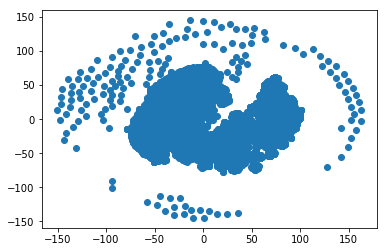

In [5]:
print(Z_X.shape)
plt.scatter(Z_X[:, 0], Z_X[:, 1])
Z = np.hstack((np.expand_dims(Z_pat, 1), Z_X))

In [6]:
print(X.shape)
print(Y.shape)
print(Z.shape)
num_outoforder = 0
for i in range(1, len(X)):
    try:
        assert(X[i, 0] == X[i-1, 0])
    except AssertionError:
        num_outoforder += 1
assert(num_outoforder == len(set(Z[:, 0])) - 1)

(17053, 2734)
(17053,)
(17053, 3)


In [7]:
# Train/Test split by Patient
train_pct = 0.6
split_idx = int(train_pct*len(X))
end = list(X[:, 0]).index(X[split_idx, 0])

# Make Patient-ID One-Hot
patients_one_hot = utils.to_one_hot_one_feature(X[:, 0])
n_patients = patients_one_hot.shape[1]
X = np.hstack((patients_one_hot, X[:, 1:]))

X_train = X[:end, :]
X_test  = X[end:, :]
Y_train = Y[:end]
Y_test  = Y[end:]
Z_train = Z[:end, :]
Z_test  = Z[end:, :]

X_not_Z_train = X_train[:, n_patients:-n_Z]
X_not_Z_test  = X_test[:,  n_patients:-n_Z]

print(X_train.shape)
print(np.mean(Y_train))
print(np.mean(Y_test))

(10195, 2750)
0.05080922020598332
0.04097404491105278


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)
scaler.fit(X_not_Z_train)
X_not_Z_train = scaler.transform(X_not_Z_train)
X_not_Z_test  = scaler.transform(X_not_Z_test)

append_ones = lambda x: np.hstack((x, np.ones((len(x), 1))))
X_train       = append_ones(X_train)#np.hstack((X_train, np.ones((len(X_train), 1))))
X_test        = append_ones(X_test)#np.hstack((X_test, np.ones((len(X_test), 1))))
X_not_Z_train = append_ones(X_not_Z_train)
X_not_Z_test  = append_ones(X_not_Z_test)

In [9]:
# Fit Baselines
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import roc_auc_score, accuracy_score

k = 2
from sklearn.model_selection import KFold
kf = KFold(n_splits=k, shuffle=False)
#x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, shuffle=False)

print("Fitting Logistic Regression with l1 Regularization")
log_reg_Cs = [1e-3, 5e-3, 1e-2, 1e-1, 1e0, 5e0]
max_lr_score = -np.inf
for c in log_reg_Cs:
    print("Fitting with C={}...Validation AUCROCs:".format(c), end='')
    lr = LogisticRegression(fit_intercept=False, penalty='l1', C=c)
    my_scores = np.zeros((k, 1))
    for i, (train_idx, valid_idx) in enumerate(kf.split(X_train)):
        lr.fit(X_train[train_idx], Y_train[train_idx])
        my_score = roc_auc_score(Y_train[valid_idx], lr.predict(X_train[valid_idx]))
        my_scores[i] = my_score
        print(" {:.3f}".format(my_score), end=',')
    print(" Mean Valid AUCROC:{:.3f}".format(np.mean(my_scores)))
    if np.mean(my_scores) > max_lr_score:
        max_lr_score = np.mean(my_scores)
        best_lr_C = c
        
print("Fitting Linear Regression with Elastic Net Regularization")
alphas   = [0., 1e-1, 1e0, 1e1]
l1_ratios = [0., 0.1, 0.5, 1., 1e1]
max_en_score = -np.inf
for a in alphas:
    for r in l1_ratios:
        if a == 0:
            en = LinearRegression(fit_intercept=False, normalize=False)
            if r > 0.:
                continue
        else:
            en = ElasticNet(alpha=a, l1_ratio=r, fit_intercept=False, normalize=False)
        print("Fitting with Alpha={}, L1_Ratio={}...Validation AUCROCs:".format(a, r), end='')
        my_scores = np.zeros((k, 1))
        for i, (train_idx, valid_idx) in enumerate(kf.split(X_train)):
            en.fit(X_train[train_idx], Y_train[train_idx])
            my_score = roc_auc_score(Y_train[valid_idx], en.predict(X_train[valid_idx]))
            my_scores[i] = my_score
            print(" {:.3f}".format(my_score), end=',')
        print(" Mean Valid AUCROC:{:.3f}".format(np.mean(my_scores)))
        if np.mean(my_scores) > max_en_score:
            max_en_score = np.mean(my_scores)
            best_en_a = a
            best_en_r = r

Fitting Logistic Regression with l1 Regularization
Fitting with C=0.001...Validation AUCROCs: 0.500, 0.500, Mean Valid AUCROC:0.500
Fitting with C=0.005...Validation AUCROCs: 0.614, 0.504, Mean Valid AUCROC:0.559
Fitting with C=0.01...Validation AUCROCs: 0.572, 0.583, Mean Valid AUCROC:0.577
Fitting with C=0.1...Validation AUCROCs: 0.593, 0.761, Mean Valid AUCROC:0.677
Fitting with C=1.0...Validation AUCROCs: 0.690, 0.769, Mean Valid AUCROC:0.730
Fitting with C=5.0...Validation AUCROCs: 0.695, 0.495, Mean Valid AUCROC:0.595
Fitting Linear Regression with Elastic Net Regularization
Fitting with Alpha=0.0, L1_Ratio=0.0...Validation AUCROCs: 0.754, 0.860, Mean Valid AUCROC:0.807
Fitting with Alpha=0.1, L1_Ratio=0.0...Validation AUCROCs: 0.744, 0.945, Mean Valid AUCROC:0.845
Fitting with Alpha=0.1, L1_Ratio=0.1...Validation AUCROCs: 0.831, 0.894, Mean Valid AUCROC:0.863
Fitting with Alpha=0.1, L1_Ratio=0.5...Validation AUCROCs: 0.993, 0.500, Mean Valid AUCROC:0.747
Fitting with Alpha=0.1, 

In [10]:
# Now use best hyper-params to predict on test data
lr = LogisticRegression(fit_intercept=False, penalty='l1', C=best_lr_C)
lr.fit(X_train, Y_train)
predictions_lr = lr.predict(X_test)
print("Logistic Regression Test Set AUCROC:{:.3f} (at C={})".format(roc_auc_score(Y_test, predictions_lr), best_lr_C))

if best_en_a == 0:
    en = LinearRegression(fit_intercept=False, normalize=False)
else:
    en = ElasticNet(alpha=best_en_a, l1_ratio=best_en_r, fit_intercept=False, normalize=False)
en.fit(X_train, Y_train)
predictions_en = en.predict(X_test)
print("Elastic Net Test Set AUCROC:{:.3f} (at a={}, l={})".format(roc_auc_score(Y_test, predictions_en),
                                                                  best_en_a, best_en_r))

Logistic Regression Test Set AUCROC:0.640 (at C=1.0)
Elastic Net Test Set AUCROC:0.794 (at a=10.0, l=0.0)


Fitting Mixture Model for Logistic Regression
* Starting EM algorithm for mixture of K=5 least squares models
* Beta = 20.734996167723246
* Lambda = 0.001
* Running at most 2000 iterations
* Stopping when complete likelihood improves less than 0.1
Obj	pi1	pi2	w11	w12	w21	w22	beta1	beta2
-16405.77		0.20	0.20	0.00	0.01	0.01	0.00	20.73	20.73
-16389.55		0.19	0.19	0.01	0.01	0.01	0.00	20.73	20.73
-15276.79		0.12	0.13	0.01	0.01	0.01	0.00	20.73	20.73
-15454.96		0.12	0.13	0.01	0.01	0.01	0.01	20.73	20.73
* Starting EM algorithm for mixture of K=5 least squares models
* Beta = 20.734996167723246
* Lambda = 0.001
* Running at most 2000 iterations
* Stopping when complete likelihood improves less than 0.1
Obj	pi1	pi2	w11	w12	w21	w22	beta1	beta2
-16397.48		0.21	0.19	-0.00	-0.00	0.02	-0.01	20.73	20.73
-16359.24		0.23	0.20	-0.00	0.00	0.02	-0.00	20.73	20.73
-14545.80		0.37	0.21	0.00	0.00	0.02	-0.01	20.73	20.73
-13965.52		0.33	0.26	0.00	0.00	0.02	-0.01	20.73	20.73
-14173.60		0.30	0.27	0.00	0.01	0.02	-0.

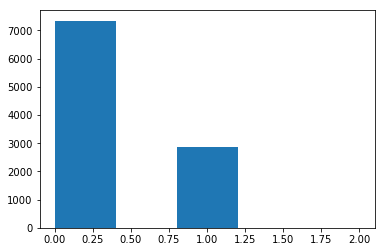

In [11]:
sys.path.append("../baselines/")
from baselines import baselines 
mixture_beta = []
n_classes = 5
task_beta, task_assignments = baselines.mixture_model_logistic(
    X_not_Z_train, np.expand_dims(Y_train, 1), n_classes=n_classes,
    lam=1e-3, n_restarts=5, verbosity=100, init_lr=1e-1, eps=1e-1)
plt.figure()
plt.hist(task_assignments, bins=n_classes)

beta_hat_mix = task_beta
np.save("beta_mixture.npy", beta_hat_mix)

In [83]:
# VC
#Z_train_one_hot = utils.to_one_hot(Z_train, [True, False, False])
print(Z_train)
# Can't use patient labels because the test set is disjoint from training
Z_train_one_hot = Z_train[:, 1:].astype(float)
vc_beta, vc_z = baselines.vc_linear(X_train, Y_train, Z_train_one_hot, 0., 1e-12, max_iters=5000)
Z_test_one_hot = np.hstack((np.ones((len(Z_test), 1)), Z_test[:, 1:]))#utils.to_one_hot(Z_test, [True, False, False])

beta_test = Z_test_one_hot.dot(vc_z)
predictions_vc  = np.array([beta_test[i].dot(X_test[i]) for i in range(len(X_test))])

[['16-1779' 31.150733947753906 -32.82478332519531]
 ['16-1779' 30.653671264648438 -36.866477966308594]
 ['16-1779' 60.51911163330078 23.559961318969727]
 ...
 ['16-1801' 1.0894016027450562 68.34717559814453]
 ['16-1801' 3.9044508934020996 67.83935546875]
 ['16-1801' 5.929170608520508 45.32478713989258]]
Fitting Varying Coefficients with Linear Output.
Restart 1 of 1
Iteration: 0 Total Loss:37113088.190 Pred:37113088.190 l1:0.000
Iteration: 50 Total Loss:1815351.775 Pred:1815351.775 l1:0.000
Iteration: 100 Total Loss:1363786.171 Pred:1363786.171 l1:0.000
Iteration: 150 Total Loss:1177152.104 Pred:1177152.104 l1:0.000
Iteration: 200 Total Loss:1081902.033 Pred:1081902.033 l1:0.000
Iteration: 250 Total Loss:1022114.467 Pred:1022114.467 l1:0.000
Iteration: 300 Total Loss:978556.327 Pred:978556.327 l1:0.000
Iteration: 350 Total Loss:943853.597 Pred:943853.597 l1:0.000
Iteration: 400 Total Loss:914728.515 Pred:914728.515 l1:0.000
Iteration: 450 Total Loss:889479.491 Pred:889479.491 l1:0.000


In [12]:
N = X_not_Z_train.shape[0]
P = X_not_Z_train.shape[1]
K = Z_train.shape[1]
beta_target = np.zeros((P))

lam=best_en_a
l1_ratio=best_en_r
gamma = 1e6
alpha = 1e-2
upsilon = 1e-2

rho_beta = lambda beta, i: lam*(
    l1_ratio*functions.lasso_penalty(beta, beta_target)+(1-l1_ratio)*functions.l2_penalty(beta, beta_target))
rho_beta_prime = lambda beta, i:lam*(
    l1_ratio*functions.lasso_derivative(beta, beta_target)+(1-l1_ratio)*functions.l2_prime(beta, beta_target))

"""
init_phi_beta = np.hstack((utils.soft_normalize(np.ones((P)))))
psi_beta = lambda phi_beta: 0.5*alpha*np.linalg.norm(phi_beta - init_phi_beta, ord=2)
psi_beta_prime = lambda phi_beta: alpha*(phi_beta - init_phi_beta)

init_beta_scale=1e0
psi_beta_scale = lambda beta_scale: 1e-2*(1./beta_scale)
psi_beta_scale_prime = lambda beta_scale: -1e-2*(beta_scale**(-2))
"""

init_phi_u = utils.soft_normalize(np.ones((K)))
psi_u      = lambda phi_u: upsilon*np.linalg.norm(phi_u, ord=1)
psi_u_prime = lambda phi_u: upsilon*np.sign(phi_u)

init_beta = np.tile(en.coef_[n_patients:-n_Z], (N, 1))
print(init_beta)
dmr = DistanceMatching(init_beta=np.random.uniform(0, 0.1, size=init_beta.shape),
                       f=functions.logistic_loss,
                       f_prime=functions.logistic_loss_prime,
                       gamma=gamma,
                       latent_dim=50,
                       n_neighbors=5,
                       update_ztree_every=25,
                       calc_dist_errors_every=1,
                       calc_closest_every=2,
                       rho_beta=rho_beta,
                       rho_beta_prime = rho_beta_prime,
                       init_phi_u=init_phi_u,
                       psi_u=psi_u,
                       psi_u_prime=psi_u_prime,
                       intercept=False, log_dir='./', n_threads=1)
# TODO: Should be measuring loss on a validation set.

dZ = [lambda x,y: functions.safe_wrapper(x, y, functions.discrete_diff)]
for i in range(1, Z.shape[1]):
    dZ.append(lambda x,y: functions.safe_wrapper(x, y, functions.abs_diff))

[[-6.840e-05 -1.773e-04 -1.046e-05 ...  3.376e-05  3.977e-05 -5.231e-05]
 [-6.840e-05 -1.773e-04 -1.046e-05 ...  3.376e-05  3.977e-05 -5.231e-05]
 [-6.840e-05 -1.773e-04 -1.046e-05 ...  3.376e-05  3.977e-05 -5.231e-05]
 ...
 [-6.840e-05 -1.773e-04 -1.046e-05 ...  3.376e-05  3.977e-05 -5.231e-05]
 [-6.840e-05 -1.773e-04 -1.046e-05 ...  3.376e-05  3.977e-05 -5.231e-05]
 [-6.840e-05 -1.773e-04 -1.046e-05 ...  3.376e-05  3.977e-05 -5.231e-05]]


In [13]:
remake_delta_Z = False
if remake_delta_Z:
    delta_Z = dmr.make_covariate_distances(Z_train, dZ, len(dZ), len(X_train))
    np.save("delta_Z.npy", delta_Z)
else:
    delta_Z = np.load("delta_Z.npy")

In [14]:
import sys
sys.setrecursionlimit(100000)
print(Y_train.shape)
print(Z_train.shape)
print(init_beta.shape)
print(X_not_Z_train)
z_dmr_lr, b_dmr_lr = dmr.fit(
    X_not_Z_train, Y_train, Z_train, dZ, delta_U=delta_Z, init_lr=1e-7, lr_decay=1-1e-4,
    init_patience=50, verbosity=1, calc_neighbors=False, hierarchical=False)

"""
(beta_hat_dmr, phi_beta, phi_u, distances_over_time, losses_over_time) = dmr.fit(
    X_not_Z_train, Y_train, Z_train, dZ, delta_U=delta_Z,
    init_lr=1e-6, init_patience=5, verbosity=1)
"""

(10195,)
(10195, 3)
(10195, 1234)
[[-0.017 -0.019 -0.021 ...  0.431 -0.017  1.   ]
 [-0.017 -0.019 -0.021 ...  0.216  0.071  1.   ]
 [-0.017 -0.019 -0.021 ...  2.831  2.196  1.   ]
 ...
 [-0.017 -0.019 -0.021 ... -0.357 -0.365  1.   ]
 [-0.017 -0.019 -0.021 ... -0.357 -0.358  1.   ]
 [-0.017 -0.019 -0.021 ... -0.357 -0.365  1.   ]]
Restart 1 of 1
[[-7.391e-05  6.428e-04 -3.495e-04 ... -2.559e-04  2.773e-04  2.641e-05]
 [-1.313e-05  4.887e-04 -2.711e-04 ...  2.847e-04  2.406e-04  1.840e-04]
 [ 9.354e-05  3.400e-04  1.910e-04 ...  6.132e-05  1.315e-04  1.329e-04]
 ...
 [-9.407e-05 -3.435e-04 -3.549e-04 ... -5.096e-04  1.562e-04 -3.991e-04]
 [ 6.914e-04 -4.188e-04 -1.557e-04 ...  6.609e-05  1.634e-04 -6.326e-05]
 [ 1.111e-06 -1.701e-04  1.785e-04 ... -1.222e-05 -2.357e-04 -2.406e-04]] [[ -0.201  19.989  -4.903 ...  11.635  -9.31   -5.55 ]
 [ -4.884 -17.147 -11.463 ...  -3.973  -1.245   4.143]
 [  0.82   -7.959 -11.533 ...   8.385  12.953   4.282]
 ...
 [ -4.83    6.52   -9.35  ...  -8.527

'\n(beta_hat_dmr, phi_beta, phi_u, distances_over_time, losses_over_time) = dmr.fit(\n    X_not_Z_train, Y_train, Z_train, dZ, delta_U=delta_Z,\n    init_lr=1e-6, init_patience=5, verbosity=1)\n'

In [15]:
beta_hat_dmr = z_dmr_lr.dot(b_dmr_lr)
print(beta_hat_dmr.shape)
phi_u = dmr.best_phi_u
print(phi_u)

(10195, 1234)
[0.333 0.333 0.333]


In [16]:
# Make Predictions
K = len(Z_test[0])
N_test = len(X_not_Z_test)
N_train = len(X_not_Z_train)
remake_delta_Z_test_train = True
if remake_delta_Z_test_train:
    delta_Z_test_train = np.zeros((N_test, N_train, K))
    print("Calculating Delta_Z Test/Train")
    for i in range(N_test):
        print("{}/{}".format(i, N_test), end='\r')
        for j in range(N_train):
            delta_Z_test_train[i, j, :] = np.array([dZ[k](Z_train[j, k], Z_test[i, k]) for k in range(K)])
    np.save("delta_Z_test_train.npy", delta_Z_test_train)
else:
    delta_Z_test_train = np.load("delta_Z_test_train.npy")
# TODO: calculating un-normalized distance but phi learned for normalized.

delta_Z_train_train = np.ones((N_train, N_train, K))
for i in range(N_train):
    delta_Z_train_train[i, i, :] = 0.

Calculating Delta_Z Test/Train


In [ ]:
z_dmr_lr_reduced = t.fit_transform(z_dmr_lr)

In [26]:
print(Z_train[:, 0])

['16-1779' '16-1779' '16-1779' ... '16-1801' '16-1801' '16-1801']


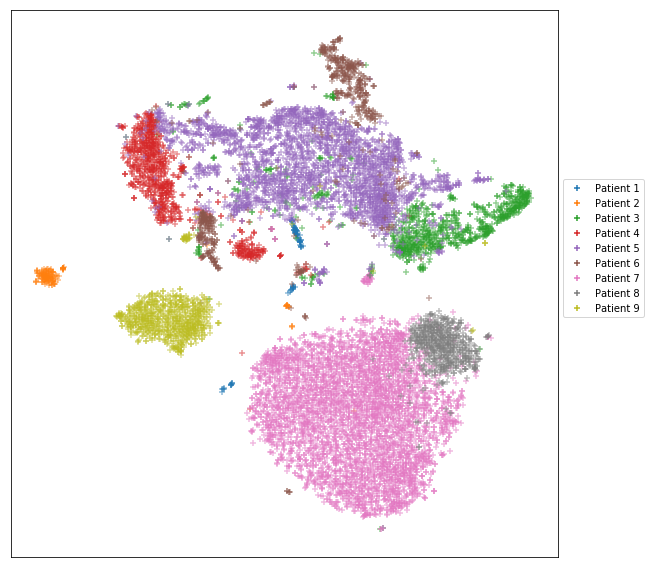

In [60]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import math
import utils
import time
import sys

sys.setrecursionlimit(10000)
# By Jake VanderPlas
# License: BSD-style
def discrete_cmap(N, base_cmap=None, exclude_white=False):
    """Create an N-bin discrete colormap from the specified input map"""
    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:
    base = plt.cm.get_cmap(base_cmap)
    if exclude_white:
        color_list = base(np.linspace(1./N, 1, N))
    else:
        color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


U_clean, names = utils.to_color_map_one_feature(Z[:, 0])
fig = plt.figure(figsize=(8,8))
#cmap = discrete_cmap(len(names), 'gist_ncar_r', exclude_white=True)
#cax = plt.scatter(z_dmr_lr_reduced[:, 0], z_dmr_lr_reduced[:, 1], c=U_clean[:],
#    cmap=cmap, marker='+', vmin=0, vmax=len(names)-1, alpha=0.5)


points = z_dmr_lr_reduced
labels = U_clean

#colors=["red", "gold", "limegreen", "blue", "yellow", "gray", "green", "magenta", "cyan", "purple", "orange", "olive", "brown", "salmon", "teal", "orchid"]
#cmap = matplotlib.colors.ListedColormap(colors)

#sc = plt.scatter(points[:,0], points[:,1], c = labels, cmap=cmap, vmin=-0.5,vmax=16.5) 
#plt.colorbar(sc, ticks=np.arange(len(extraPoints)))

#plt.show()

ticks = list(range(len(names)))
ticks = [x*(1-1./len(ticks)) + .5 for x in ticks]
#cbar = fig.colorbar(cax, orientation='vertical', ticks=ticks)
#cbar.ax.set_yticklabels(names)
for i, x in enumerate(np.unique(Z_train[:, 0])):
    idx = np.where(Z_train[:, 0] == x)
    plt.scatter(z_dmr_lr_reduced[idx, 0], z_dmr_lr_reduced[idx, 1], marker='+', alpha=0.5, label="Patient {}".format(i+1))
    #plt.scatter(z_dmr_lr_reduced[:, 0], z_dmr_lr_reduced[:, 1], marker='+', alpha=0.7, c=Z_train)
plt.xticks([])
plt.yticks([])
leg = plt.legend(bbox_to_anchor=(1, 0.7))
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.tight_layout()
fig.savefig("z_dmr_lr_reduced.png", dpi=300, bbox_extra_artists=(leg,), bbox_inches='tight')

In [18]:
# TODO: Should have predict as a function in the DMR object.
def make_predictions(beta, X_test, delta_Z_test_train, n_neighbors, phi_u=None):
    if phi_u is None:
        phi_u = np.ones_like(U_train[0], dtype='float64')

    K = len(delta_Z_test_train[0, 0])
    N_train = delta_Z_test_train.shape[1]
    err = 0.
    predictions = []
    for i in range(len(X_test)):
        print(i, end='\r')
        closest = np.argsort(delta_Z_test_train[i, :, :].dot(phi_u))
        knn = np.mean(beta[closest[:n_neighbors]], axis=0)
        predictions.append(X_test[i, :].T.dot(knn))
    return np.array(predictions)

predictions_mix = make_predictions(beta_hat_mix, X_not_Z_test, delta_Z_test_train, 1, phi_u=phi_u)
train_predictions_dmr = make_predictions(beta_hat_dmr, X_not_Z_train, delta_Z_train_train, 1, phi_u=phi_u)

In [19]:
predictions_dmr = np.exp(make_predictions(beta_hat_dmr, X_not_Z_test, delta_Z_test_train, 15, phi_u=phi_u))

In [84]:
print(np.mean(Y_test))
print("Train:")
print(roc_auc_score(Y_train, train_predictions_dmr))

print("Test AUROC: ")
print("LR: {:.3f}".format(roc_auc_score(Y_test, predictions_lr)))
print("EN: {:.3f}".format(roc_auc_score(Y_test, predictions_en)))
print("Mixture: {:.3f}".format(roc_auc_score(Y_test, predictions_mix)))
print("VC: {:.3f}".format(roc_auc_score(Y_test, predictions_vc)))
print("Personalized: {:.3f}".format(roc_auc_score(Y_test, predictions_dmr)))

print(Y_test, predictions_dmr)
print("Test F1s:")
from sklearn.metrics import f1_score
def f1(preds):
    best_f1 = 0.
    for thresh in np.linspace(0, 1, 100000):
        f = f1_score(Y_test, preds > thresh)
        if f > best_f1:
            best_f1 = f
    return best_f1
print("LR: {:.3f}".format(f1(predictions_lr)))
print("EN: {:.3f}".format(f1(predictions_en)))
print("Mixture: {:.3f}".format(f1(predictions_mix)))
print("VC: {:.3f}".format(f1(predictions_vc)))
print("Personalized: {:.3f}".format(f1(predictions_dmr)))


print("Test Accs: ")
print("LR: {:.3f}".format(accuracy_score(Y_test, predictions_lr)))
def calc_acc(preds):
    best_acc = 0.
    for thresh in np.linspace(0, 1, 10000):
        acc = accuracy_score(Y_test, preds > thresh)
        if acc > best_acc:
            best_acc = acc
    return best_acc
print("EN: {:.3f}".format(calc_acc(predictions_en)))
print("Mixture: {:.3f}".format(calc_acc(predictions_mix)))
print("VC: {:.3f}".format(calc_acc(predictions_vc)))
print("Personalized: {:.3f}".format(calc_acc(predictions_dmr)))

0.04097404491105278
Train:
1.0
Test AUROC: 
LR: 0.640
EN: 0.794
Mixture: 0.889
VC: 0.333
Personalized: 0.923
[0 0 0 ... 0 0 0] [0.951 0.93  0.922 ... 0.656 0.266 0.824]
Test F1s:
LR: 0.438
EN: 0.175
Mixture: 0.419
VC: 0.044
Personalized: 0.646
Test Accs: 
LR: 0.970
EN: 0.962
Mixture: 0.936
VC: 0.473
Personalized: 0.975


In [168]:
with open("results.txt", 'w') as out_file:
    print("LR: {:.3f}".format(roc_auc_score(Y_test, predictions_lr)), file=out_file)
    print("EN: {:.3f}".format(roc_auc_score(Y_test, predictions_en)), file=out_file)
    print("Mixture: {:.3f}".format(roc_auc_score(Y_test, predictions_mix)), file=out_file)
    print("Personalized: {:.3f}".format(roc_auc_score(Y_test, predictions_dmr)), file=out_file)